In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)


c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic\ch05-optimization
c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic


============== iteration: 0=======================
std=0.01:2.302564232640033
Xavier:2.298967941057156
He:2.3619956210461526
============== iteration: 100=======================
std=0.01:2.302104215341603
Xavier:2.2231237936496946
He:1.6078924021627934
============== iteration: 200=======================
std=0.01:2.301120053911552
Xavier:1.9678904248171216
He:0.6021932405940214
============== iteration: 300=======================
std=0.01:2.301672278900891
Xavier:1.5458221566681325
He:0.470606058842792
============== iteration: 400=======================
std=0.01:2.3022632385990516
Xavier:1.1661426478627421
He:0.5918270126383633
============== iteration: 500=======================
std=0.01:2.3007602771771607
Xavier:0.7546944229822073
He:0.32980604426123816
============== iteration: 600=======================
std=0.01:2.2985646711405314
Xavier:0.5809400823422851
He:0.3101564295152934
============== iteration: 700=======================
std=0.01:2.3011740957233044
Xavier:0.49520958504952

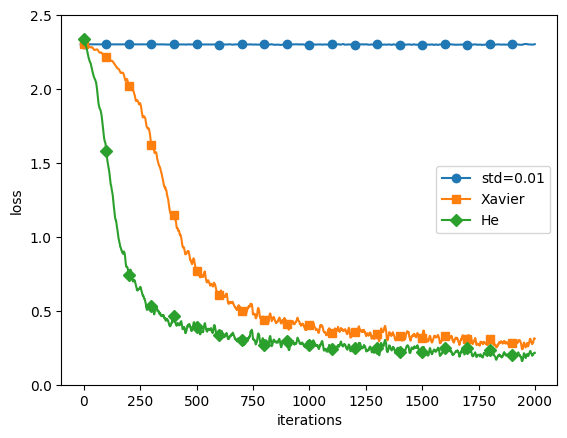

In [4]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# 1. mnist 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000 # 빠르게 보기 위해서

# 2. 실험용 설정
weight_init_types = {'std=0.01':0.01, 'Xavier': 'sigmoid', 'He' : 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std = weight_type)
    train_loss[key] = []

# 3. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print('============== iteration: ' + str(i) + "=======================")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 4. 그래프 그리기 
markers = {'std=0.01':'o', 'Xavier': 's', 'He' : 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker = markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()